<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Artificial Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2022

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 2
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  1 Azar
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Info
student_number =  
Name =   
Last_Name = 

# Rules
- This assignment is due Azar 1th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Azar 11th 23:59:59.

# CSP (Constraint Satisfaction Problem) (100 Points)

<font size=4>
Author: M.Taha Jahani-Nezhad
			<br/>
</font>
    </div>

In this homework, we are going to take a look at a famous problem which has many different practical usages in the engineering world.
Informally, the problem is about marking different parts of a special ruler such that the distance between every two marks is unique.

To give you an example, consider the ruler below:

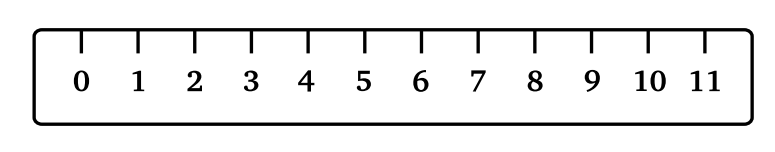

Now if we want to put ${5}$ marks on the ruler, with the condition stated above, the result might look like the image below:

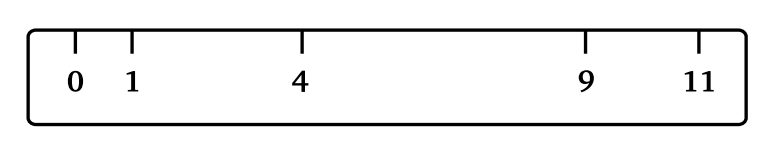

If we take dive deeper, we will see that the difference between every two marks is unique:

${1-0 = 1, 4-0=4, 9-0=9, 11-0=11, 4-1=3, ...}$

we call this kind of ruler, a *Golomb Ruler*, named after the american mathematician, Solomon W. Golomb.

Note that, it is proven through trial and error that among all the different acceptable answers of this problem with ${5}$ marks, a ruler with the length of ${11}$ is the shortest possible ruler.

The formal difinition of this problem is as follows:
A set of integers

\begin{equation}
A = {a_1, a_2, ..., a_n} \qquad a_1<a_2<...<a_n
\end{equation}

is called a Golomb ruler if for each integer ${x\neq0}$ there is at most one solution to the equation

\begin{equation}
x = a_j - a_i \qquad a_j,a_i \in A
\end{equation}

The difference between the largest and the smallest element of the set, i.e. ${a_n - a_1}$, is called the **length** of the ruler.

In this homework, we are going to use CSP methods to find the smallest golomb ruler for a given number of marks.

**Complete the _CSP.py_ file and then run the following cells to test your implementation.**

*Be aware that it is obvious that you cannot pass all the 26 tests with normal computers - they require strong servers and they take a huge amount of time - but at least you have to pass about 7 or 8 first tests to get most of this homework mark.*

## Testing Your Code

The test data for this homework is a simple .csv file with three columns: number of marks, minimum available length and place of each mark.
Your code is tested with two functions: `find_minimum_length()` and `get_variables()`

Note that in some cases, there might be multiple acceptable assignment of variables but you have to return the one which is numerically the lowest.

To test you code, put the `data.csv` file in the same folder of your code and run this script:

In [ ]:
import signal
import pandas as pd
from CSP import CSP

# You are not allowed to change this cell!

def handler(signum, frame):
    raise Exception("End Of Running Time")


def run_tests():
    df = pd.read_csv("data.csv")
    df = df.reset_index()
    for index, row in df.iterrows():
        signal.signal(signal.SIGALRM, handler)
        signal.alarm(10)
        csp = CSP(int(row['marks']))
        print(f"Running Test {index}..., ", end=" ")
        try:
            result = csp.find_minimum_length()
            variables = csp.get_variables()
            expected = int(row['len'])
            check_variables = check_output(variables, row['array'])
            accepted = result == expected and check_variables
        except:
            accepted = False
        if accepted:
            print(f"passed!")
        else:
            print(f"\u001B[31mfailed\u001B[0m")


def check_output(output, expected):
    expected = sorted(map(int, expected.split(" ")))
    output = sorted(output)
    if len(expected) != len(output):
        return False
    for i in range(len(expected)):
        if expected[i] != output[i]:
            return False
    return True


run_tests()
